<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Supervised Learning Model Comparison

_author The arbitrary and capricious heart of data science_

---

### Let us begin...

Recall the "data science process."
   1. Define the problem.
   2. Gather the data.
   3. Explore the data.
   4. Model the data.
   5. Evaluate the model.
   6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

### Data Dictionary
variables|meaning|
----|---|
e401k |1 if eligble for 401(k)|
inc |income|
marr  |1 if married|
male  |1 if male respondent|
age    |age^2|
fsize   |   family size|
nettfa   |    net total fin. assets, $1000|
p401k    |1 if participate in 401(k)|
pira   |1 if have IRA|
incsq  | inc^2|
agesq   |   age^2|

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, BaggingClassifier, GradientBoostingClassifier,\
RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor
from sklearn import metrics

In [2]:
# import dataset
account = pd.read_csv('401ksubs.csv')

In [3]:
# display first 5 rows
account.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [4]:
# check dataset info
account.info()

# There are no missing values
# every variables have correct type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275 entries, 0 to 9274
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   e401k   9275 non-null   int64  
 1   inc     9275 non-null   float64
 2   marr    9275 non-null   int64  
 3   male    9275 non-null   int64  
 4   age     9275 non-null   int64  
 5   fsize   9275 non-null   int64  
 6   nettfa  9275 non-null   float64
 7   p401k   9275 non-null   int64  
 8   pira    9275 non-null   int64  
 9   incsq   9275 non-null   float64
 10  agesq   9275 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 797.2 KB


##### 2. What are 2-3 other variables that, if available, would be helpful to have?

1. Jobs which can also help for predict inc and e401k if customers have a good job it may have relationship with target variable.
2. Dept which can help detect that customers can eligible for 401k or not.

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

It is an unethical decision because we are in civilize world every race should be treat equal.

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

in regression problems predict income<br>
1. From heatmap first value that not use is incsq which is inc^2 it may lead dataleak
2. e401k, p401k, pira can't use because it also like the reason above it may lead to dataleak

#### EDA

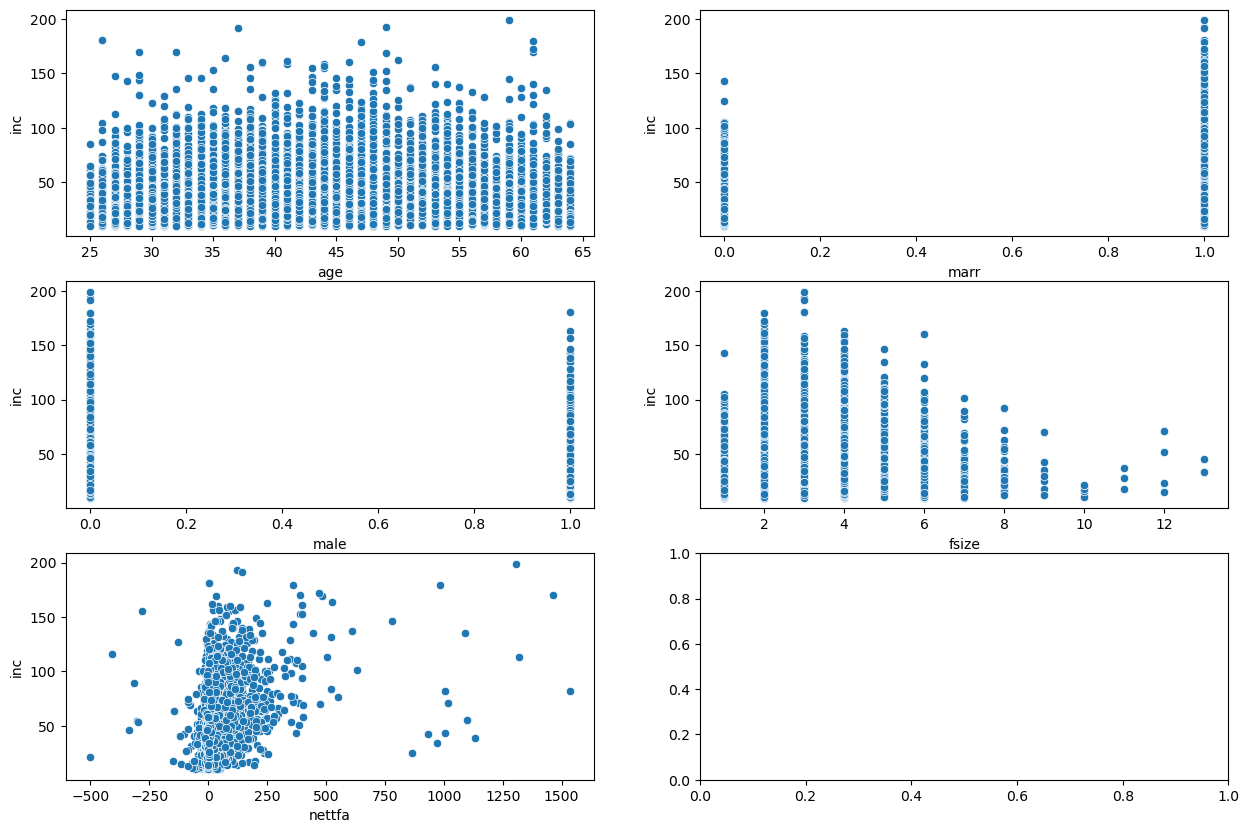

In [5]:
# plot relationship between variables and income
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

for i, col in enumerate(['age', 'marr', 'male', 'fsize', 'nettfa']):
    x = i // 2
    y = i % 2
    sns.scatterplot(ax=axes[x,y], x=col, y='inc', data=account)

<AxesSubplot:xlabel='inc', ylabel='Count'>

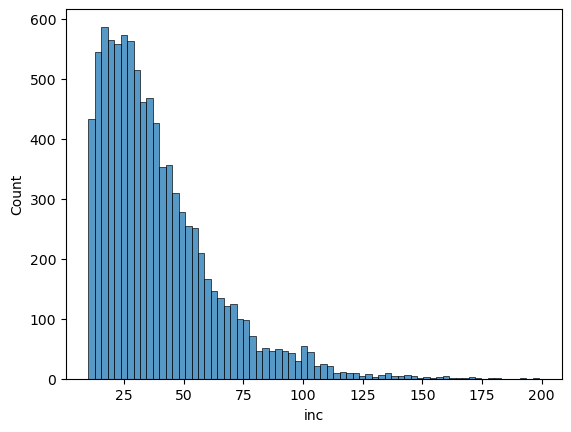

In [6]:
# plot income distribution
sns.histplot(x='inc', data=account)

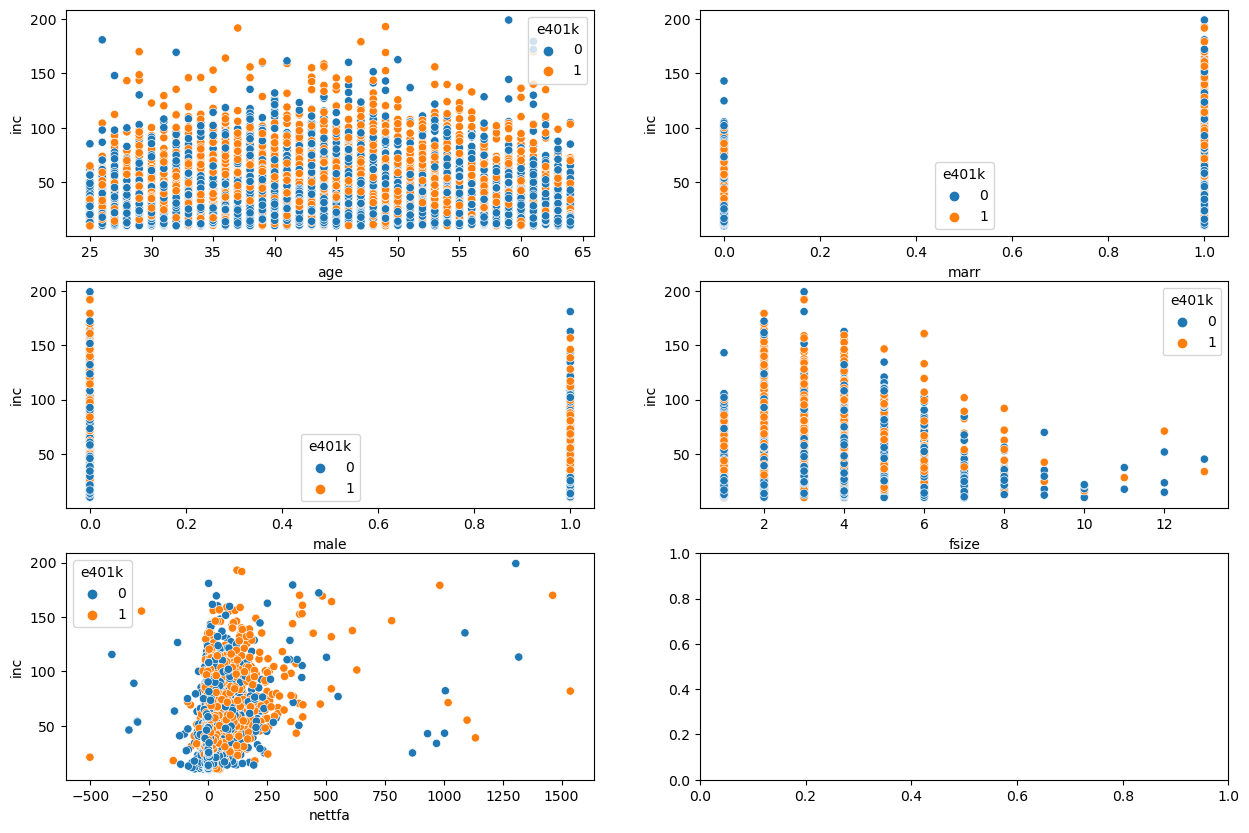

In [158]:
# plot relationship between variables and e401k
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

for i, col in enumerate(['age', 'marr', 'male', 'fsize', 'nettfa']):
    x = i // 2
    y = i % 2
    sns.scatterplot(ax=axes[x,y], x=col, y='inc', hue='e401k', data=account)

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

two variables have already been feature engineering are agesq and incsq.

Subject-matter experts do feature engineering because it can **improve performance** of models.

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

**inc** variable in data dictionary it show meaning is inc^2 which it should be income.

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week |6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

Modeling
   - Linear Regression is appropriate because it easy to apply and interpret. but cost is less predictive power.
   - KNN is not appropriate because knn doesn't has features importance for interpret.
   - Decision Tree and Set of bagged decision trees are appropriate because it take a little of time for tune hyperparameter and also have features importance for interpret.
   - Random Forest is appropriate because it has predictive more than above and also consume less than boosting tactics.
   - Ada boosting and Gradient boosting are not appropriate because they consume a lot of time for tune hyperparameter for this small dataset.

Modeling tactics
   - Bagging for this problem it might help for decrease overfitting.
   - Boosting for this problem dataset has many outliers, boosting is sensitive to outliers thus it can make model worse than normal.
   - Stacking from dataset it is small dataset which is not worth for use stacking because it consume a lot of time.

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

### Train Test Split on regression problem

In [8]:
# create features and target store in X, y
X = account.drop(columns=['inc', 'e401k', 'p401k', 'pira', 'incsq', 'agesq', 'age'])
y = account['inc']

In [9]:
# Train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=42)

### Linear Regression
- Normal
- Bagging

In [10]:
# instantiate linear regression and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
# score of train and test 
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.27565993248493803
0.22717398275027756


In [12]:
# instantiate bagging on linear regression and train model
bag_lr = BaggingRegressor(base_estimator=lr,
                          n_estimators=30, random_state=22)
bag_lr.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearRegression(), n_estimators=30,
                 random_state=22)

In [13]:
# score of train and test 
print(bag_lr.score(X_train, y_train))
print(bag_lr.score(X_test, y_test))

0.275649584034399
0.22707707062022242


### k-nearest neighbors
- Normal
- Bagging

In [14]:
# instantiate kNN regressor and train model
knn_pi = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

knn_param = {
    'knn__n_neighbors':list(range(3, 30))
}

knn_gs = GridSearchCV(estimator=knn_pi,
                      param_grid=knn_param)

knn_gs.fit(X_train, y_train)
knn_gs.best_params_

{'knn__n_neighbors': 23}

In [15]:
# score of train and test 
print(knn_gs.score(X_train, y_train))
print(knn_gs.score(X_test, y_test))

0.4193197714847001
0.36368171384777215


In [16]:
# instantiate bagging on kNN regressor and train model
bag_knn = BaggingRegressor(base_estimator=knn_pi, random_state=22)

bag_knn_param = {
    'base_estimator__knn__n_neighbors':list(range(3, 30))
}

bag_knn_gs = GridSearchCV(estimator=bag_knn,
                      param_grid=bag_knn_param)

bag_knn_gs.fit(X_train, y_train)
bag_knn_gs.best_params_

{'base_estimator__knn__n_neighbors': 29}

In [17]:
# score of train and test 
print(bag_knn_gs.score(X_train, y_train))
print(bag_knn_gs.score(X_test, y_test))

0.4119445946465945
0.3638177584070079


### Decision Tree
- Normal
- Bagging

In [18]:
# instantiate Decision tree regressor and train model
tree = DecisionTreeRegressor(random_state=22)
tree_param = {
    'max_depth' : [5, 10, 15],
    'min_samples_split' : [2, 4, 6],
    'min_samples_leaf' : [1, 3, 5]
}

tree_gs = GridSearchCV(tree, tree_param)
tree_gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=22),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6]})

In [19]:
# score of train and test 
print(tree_gs.score(X_train, y_train))
print(tree_gs.score(X_test, y_test))

0.41006664005088755
0.35825149393644695


### Set of Bagged Decision Trees

In [20]:
# instantiate Bagging Decision tree regressor and train model
bag_tree = BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=22)
bag_tree_param = {
    'n_estimators' : [20],
    'base_estimator__max_depth' : [5, 10],
    'base_estimator__min_samples_split' : [2, 4],
    'base_estimator__min_samples_leaf' : [3, 5]
}


bag_tree_gs = GridSearchCV(bag_tree, bag_tree_param)
bag_tree_gs.fit(X_train, y_train)
bag_tree_gs.best_params_

{'base_estimator__max_depth': 5,
 'base_estimator__min_samples_leaf': 5,
 'base_estimator__min_samples_split': 2,
 'n_estimators': 20}

In [21]:
# score of train and test 
print(bag_tree_gs.score(X_train, y_train))
print(bag_tree_gs.score(X_test, y_test))

0.41724498274984123
0.3725917292435261


### Random Forest Regressor

In [22]:
# Instantitae Random foreset and train model
rf = RandomForestRegressor()
rf_param = {
    'n_estimators' : [300],
    'max_depth' : [5, 10],
    'min_samples_split' : [2, 4]
}

rf_gs = GridSearchCV(rf, rf_param)

rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'min_samples_split': [2, 4],
                         'n_estimators': [300]})

In [23]:
rf_gs.best_params_

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}

In [24]:
# score of train and test 
print(rf_gs.score(X_train, y_train))
print(rf_gs.score(X_test, y_test))

0.42289367214620577
0.36961880336233466


### Ada Boost Model

In [25]:
ada = AdaBoostRegressor(base_estimator=RandomForestRegressor())
ada_param = {
    'base_estimator__n_estimators' : [300],
    'base_estimator__max_depth' : [5],
    'base_estimator__min_samples_split' : [6]
}

ada_gs = GridSearchCV(ada, ada_param, verbose=1)

ada_gs.fit(X_train, y_train)
ada_gs.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'base_estimator__max_depth': 5,
 'base_estimator__min_samples_split': 6,
 'base_estimator__n_estimators': 300}

In [26]:
# score of train and test 
print(ada_gs.score(X_train, y_train))
print(ada_gs.score(X_test, y_test))

0.3189152803597265
0.2547033202557586


##### 9. What is bootstrapping?

1. use train data and random some train data as test. 
2. fill train data with replacement. 
3. do the same as above n-times.
4. for predictions use majority vote from all of models.

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

The difference
- Decision tree is just one tree
- Bagged decision trees is n-trees using bootstrapping for predict targets.

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

The difference
- Bagged decision trees use all of features for train models
- Random forest use subset of features for train models

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

Because random forest use subset of features that can decrease noise features, but bagged decision trees use all of features that may include noise features

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [27]:
# create dataframe store rmse on train and test
rmse_df = pd.DataFrame(columns=['model', 'rmse_train', 'rmse_test'])

for i, m in enumerate([lr, bag_lr, knn_gs, bag_knn_gs, tree_gs, bag_tree_gs, rf_gs, ada_gs]):
    rmse_train = metrics.mean_squared_error(y_train, m.predict(X_train), squared=False)
    rmse_test = metrics.mean_squared_error(y_test, m.predict(X_test), squared=False)
    rmse_df.loc[i] = [str(m), rmse_train, rmse_test]

# calculate value different between rmse train and test
rmse_df['diff'] = rmse_df['rmse_train'] - rmse_df['rmse_test']

In [28]:
# display rmse 
rmse_df

,model,rmse_train,rmse_test,diff
0,LinearRegression(),20.407241,21.465722,-1.058481
1,BaggingRegressor(base_estimator=LinearRegressi...,20.407387,21.467068,-1.059681
2,"GridSearchCV(estimator=Pipeline(steps=[('ss', ...",18.271810,19.477887,-1.206077
3,GridSearchCV(estimator=BaggingRegressor(base_e...,18.387478,19.475805,-1.088326
4,GridSearchCV(estimator=DecisionTreeRegressor(r...,18.416815,19.560821,-1.144006
5,GridSearchCV(estimator=BaggingRegressor(base_e...,18.304424,19.341037,-1.036613
6,GridSearchCV(estimator=RandomForestRegressor()...,18.215495,19.386806,-1.171311
7,GridSearchCV(estimator=AdaBoostRegressor(base_...,19.788534,21.079933,-1.291400


##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

Based on training RMSE and testing RMSE there are no overfitting in any model.

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

Linear Regression Because when comparing score to another models there is no significant different to another models and It also has explanability to non-technical audience.

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

1. Do thoughtful gridsearchCV for optimize the models
2. Do features engineering for improve predictive power to models

## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

p401k It like the answer for model if customer participate in 401k they need to eligible for 401k.

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

Modeling
   - Logistic Regression is appropriate because it easy to apply and interpret. but cost is less predictive power.
   - KNN is not appropriate because it can't interpret which features are importance.
   - Decision Tree and Set of bagged decision trees are appropriate because it take a little of time for tune hyperparameter and also have features importance for interpret.
   - Random Forest is appropriate because it has predictive more than above and also consume less than boosting tactics.
   - Ada boosting and Gradient boosting are not appropriate because they consume a lot of time for tune hyperparameter for this small dataset.

Modeling tactics
   - Bagging for this problem it might help for decrease overfitting.
   - Boosting for this problem dataset has many outliers, boosting is sensitive to outliers thus it can make model worse than normal.
   - Stacking from dataset it is small dataset which is not worth for use stacking because it consume a lot of time.

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [29]:
# create X and y for classification problem
cls_X = account.drop(columns=['e401k', 'p401k', 'age', 'agesq', 'incsq'])
cls_y = account['e401k']

In [30]:
# Train test split
cls_X_train, cls_X_test, cls_y_train, cls_y_test = train_test_split(cls_X, cls_y,
                                                   stratify=cls_y,
                                                   random_state=22)

### Logistic Regression

In [31]:
# instantiate logreg and train model
logreg_pi = Pipeline([
    ('ss', StandardScaler()),
    ('logreg', LogisticRegression())
])

logreg_pi.fit(cls_X_train, cls_y_train)

Pipeline(steps=[('ss', StandardScaler()), ('logreg', LogisticRegression())])

In [32]:
# score of train and test 
print(logreg_pi.score(cls_X_train, cls_y_train))
print(logreg_pi.score(cls_X_test, cls_y_test))

0.6523864289821737
0.6498490728762397


In [33]:
# instantiate logreg and bagged and train
logreg_bag = BaggingClassifier(base_estimator = logreg_pi)
logreg_bag.fit(cls_X_train, cls_y_train)

BaggingClassifier(base_estimator=Pipeline(steps=[('ss', StandardScaler()),
                                                 ('logreg',
                                                  LogisticRegression())]))

In [34]:
# score of train and test 
print(logreg_bag.score(cls_X_train, cls_y_train))
print(logreg_bag.score(cls_X_test, cls_y_test))

0.6528177113283496
0.648124191461837


### KNN classifier

In [35]:
# instantiate knn and train model
cls_knn_pi = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

cls_knn_param = {
    'knn__n_neighbors' : list(range(3,30))
}

cls_knn_gs = GridSearchCV(cls_knn_pi, cls_knn_param)
cls_knn_gs.fit(cls_X_train, cls_y_train)
cls_knn_gs.best_params_

{'knn__n_neighbors': 29}

In [36]:
# score of train and test 
print(cls_knn_gs.score(cls_X_train, cls_y_train))
print(cls_knn_gs.score(cls_X_test, cls_y_test))

0.6897642323174238
0.6576110392410521


In [37]:
cls_knn_bag = BaggingClassifier(base_estimator = cls_knn_pi)
cls_knn_bag_param = {
    'base_estimator__knn__n_neighbors': list(range(3,30))
}
cls_knn_bag_gs = GridSearchCV(cls_knn_bag, cls_knn_bag_param)
cls_knn_bag_gs.fit(cls_X_train, cls_y_train)
cls_knn_bag_gs.best_params_

{'base_estimator__knn__n_neighbors': 29}

In [38]:
# score of train and test 
print(cls_knn_bag_gs.score(cls_X_train, cls_y_train))
print(cls_knn_bag_gs.score(cls_X_test, cls_y_test))

0.6899079930994825
0.6584734799482536


### Decision Tree

In [39]:
cls_tree = DecisionTreeClassifier()

cls_tree_param = {
    'max_depth' : [5, 10, 15],
    'min_samples_split' : [2, 4, 6],
    'min_samples_leaf' : [1, 3, 5]
}

cls_tree_gs = GridSearchCV(cls_tree, cls_tree_param)
cls_tree_gs.fit(cls_X_train, cls_y_train)
cls_tree_gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [40]:
# score of train and test 
print(cls_tree_gs.score(cls_X_train, cls_y_train))
print(cls_tree_gs.score(cls_X_test, cls_y_test))

0.7001150086256469
0.6770159551530832


### Set of Bagged Decision Tree

In [41]:
# instantiate Bagging Decision tree regressor and train model
cls_bag_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier())
cls_bag_tree_param = {
    'n_estimators' : [10, 20],
    'base_estimator__max_depth' : [5, 10],
    'base_estimator__min_samples_split' : [2, 4],
    'base_estimator__min_samples_leaf' : [3, 5]
}

cls_bag_tree_gs = GridSearchCV(cls_bag_tree, cls_bag_tree_param)
cls_bag_tree_gs.fit(cls_X_train, cls_y_train)
cls_bag_tree_gs.best_params_

{'base_estimator__max_depth': 5,
 'base_estimator__min_samples_leaf': 5,
 'base_estimator__min_samples_split': 2,
 'n_estimators': 10}

In [42]:
# score of train and test 
print(cls_bag_tree_gs.score(cls_X_train, cls_y_train))
print(cls_bag_tree_gs.score(cls_X_test, cls_y_test))

0.7008338125359402
0.6774471755066839


### Random Forest Classifier

In [43]:
# Instantitae Random foreset and train model
cls_rf = RandomForestClassifier()
cls_rf_param = {
    'n_estimators' : [300],
    'max_depth' : [5, 10],
    'min_samples_split' : [2, 4]
}

cls_rf_gs = GridSearchCV(cls_rf, cls_rf_param)

cls_rf_gs.fit(cls_X_train, cls_y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10], 'min_samples_split': [2, 4],
                         'n_estimators': [300]})

In [44]:
# score of train and test 
print(cls_rf_gs.score(cls_X_train, cls_y_train))
print(cls_rf_gs.score(cls_X_test, cls_y_test))

0.6989649223691777
0.6778783958602846


### Ada boost Classifier

In [45]:
cls_ada = AdaBoostClassifier(base_estimator=RandomForestClassifier())
cls_ada_param = {
    'base_estimator__n_estimators' : [300],
    'base_estimator__max_depth' : [5],
    'base_estimator__min_samples_split' : [6]
}

cls_ada_gs = GridSearchCV(cls_ada, cls_ada_param, verbose=1)

cls_ada_gs.fit(cls_X_train, cls_y_train)
cls_ada_gs.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'base_estimator__max_depth': 5,
 'base_estimator__min_samples_split': 6,
 'base_estimator__n_estimators': 300}

In [46]:
# score of train and test 
print(cls_ada_gs.score(cls_X_train, cls_y_train))
print(cls_ada_gs.score(cls_X_test, cls_y_test))

0.831081081081081
0.6614920224234584


## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

False positive is someone is not eligible for a 401k but model predict is eligible for a 401k. <br>
False negative is someone is eligible for a 401k but model predict is not eligible for a 401k.

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

Minimize false negative because Bank company doesn't want to lose customers.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

Optimize **Recall** Minimize false nagative.

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

Because it can compare all the models with precision and recall (harmonic mean) roughly at the same time.

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

In [47]:
# create dataframe store rmse on train and test
f1_df = pd.DataFrame(columns=['model', 'f1_train', 'f1_test'])

for i, m in enumerate([logreg_pi, logreg_bag, cls_knn_gs, cls_knn_bag_gs, cls_tree_gs, cls_bag_tree_gs, cls_rf_gs, cls_ada_gs]):
    f1_train = metrics.f1_score(cls_y_train, m.predict(cls_X_train))
    f1_test = metrics.f1_score(cls_y_test, m.predict(cls_X_test))
    f1_df.loc[i] = [str(m), f1_train, f1_test]

# calculate value different between rmse train and test
f1_df['diff'] = f1_df['f1_train'] - f1_df['f1_test']

In [48]:
# display f1 score in train and test 
f1_df

,model,f1_train,f1_test,diff
0,"Pipeline(steps=[('ss', StandardScaler()), ('lo...",0.388777,0.368585,0.020192
1,BaggingClassifier(base_estimator=Pipeline(step...,0.392147,0.369397,0.022750
2,"GridSearchCV(estimator=Pipeline(steps=[('ss', ...",0.539086,0.479685,0.059400
3,GridSearchCV(estimator=BaggingClassifier(base_...,0.534025,0.478261,0.055764
4,GridSearchCV(estimator=DecisionTreeClassifier(...,0.593055,0.556542,0.036513
5,GridSearchCV(estimator=BaggingClassifier(base_...,0.586857,0.552096,0.034761
6,GridSearchCV(estimator=RandomForestClassifier(...,0.573350,0.541436,0.031913
7,GridSearchCV(estimator=AdaBoostClassifier(base...,0.766076,0.522796,0.243280


##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

AdaBoostClassifier is overfitting. It has F1 score Train and Test different .24 which the highest different.

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

Random forest because it has good score in f1 score test, and it has low score different when compare to f1 score train. 

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

1. Do GridsearchCV for tuning hyperparameters.
2. Do features engineering for improve predictive power for model.

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

### Regression: Best Feature predict income


In [116]:
# Create dataframe store Linear Regression Coefficient
pd.DataFrame([[n,round(i,2)] for n, i in zip(lr.feature_names_in_, lr.coef_)], columns=['feature', 'coefficient'])\
.sort_values('coefficient',ascending=False)

,feature,coefficient
0,marr,20.33
1,male,2.91
3,nettfa,0.13
2,fsize,-1.54


Best feature predict income is marry
if **marry** income will constant 20,000 USD

In [121]:
# display dataframe that compare rmse train and test
rmse_df

,model,rmse_train,rmse_test,diff
0,LinearRegression(),20.407241,21.465722,-1.058481
1,BaggingRegressor(base_estimator=LinearRegressi...,20.407387,21.467068,-1.059681
2,"GridSearchCV(estimator=Pipeline(steps=[('ss', ...",18.271810,19.477887,-1.206077
3,GridSearchCV(estimator=BaggingRegressor(base_e...,18.387478,19.475805,-1.088326
4,GridSearchCV(estimator=DecisionTreeRegressor(r...,18.416815,19.560821,-1.144006
5,GridSearchCV(estimator=BaggingRegressor(base_e...,18.304424,19.341037,-1.036613
6,GridSearchCV(estimator=RandomForestRegressor()...,18.215495,19.386806,-1.171311
7,GridSearchCV(estimator=AdaBoostRegressor(base_...,19.788534,21.079933,-1.291400


From all models scores are not far-between each others, thus I choose Linear Regression for predict income because it's easy to interpret for all kind of audience.
for limitation 
- from scatterplot all features are hard to find pattern with income 
- it lack of features for predict income such as jobs or dept etc.

### Classification: Predict whether or not one is eligible for a 401k.

In [159]:
# Create dataframe store Linear Regression Coefficient
pd.DataFrame([[n,i] for n, i in zip(cls_rf_gs.feature_names_in_, cls_rf_gs.best_estimator_.feature_importances_)],\
             columns=['feature', 'importance']).sort_values('importance',ascending=False)

,feature,importance
4,nettfa,0.540083
0,inc,0.360607
5,pira,0.051633
3,fsize,0.027148
1,marr,0.014383
2,male,0.006146


Best feature predict e401k is net total finance
**net toal finance** is important factor for predict eligible for a 401k

From all models Decision Tree has f1 score around set of bagged decision tree but I choose decision tree because it consume time less than bagged of decision tree
for limitation 
- from scatterplot all features are hard to find pattern with e401k 
- it lack of features for predict income such as jobs or dept etc.